<a href="https://colab.research.google.com/github/SaketMunda/tensorflow-fundamentals/blob/master/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

In this notebook, we're going to set the foundations for how you can take a sample of inputs(this is our data), build a neural network to discover patterns in those inputs and then make a prediction(in form of a number) based on those inputs.

## Typical Architecture of Regression Neural Network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural network.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


> 🔑 **Note**: A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [2]:
# Import the tensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

Since we're working on a regression problem (predicting a number), let's create some linear data (a straight line) to model.

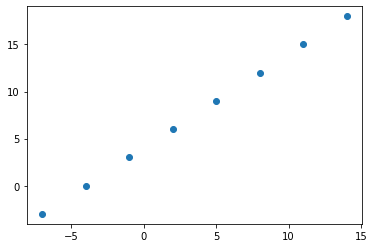

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([-3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualise it
plt.scatter(X,y);

Before we do any modelling, can we calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0 ?

or how about if X was -10.0 ?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.
The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors(or arrays).

Before, we created data using Numpy arrays, but we could do the same with tensors.

In [4]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

It says input shape as 3, and output shape is 1


![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)

*If we were working on building a machine learning algorithm for predicting housing prices, our inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since we are trying to predict the price of the house, our output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model**: piece together the layers of a neural network yourself (using Functional or Sequential API) or import a previously build model (known as transfer learning).
2. **Compiling a model**: defining how a model performance should be measured(loss/metrics) as well as defining how it should improve(optimizer)
3. **Fitting a model**: letting the model try to find patterns in the data(how does x get to y)


Let's see using the Keras Sequential API to build a model for our regression problem.

In [6]:
# set the random see
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Dense means, fully connected layer, it means all the neurons are connected with all the neurons of the next layer

# compile the model

model.compile(loss= tf.keras.losses.mae, # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 598ms/step - loss: 5.5048 - mae: 5.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 5.3723 - mae: 5.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 5.2398 - mae: 5.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 5.1073 - mae: 5.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 4.9748 - mae: 4.9748


We've just trained a model to figure out the patterns between X and y


In [7]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.]))

What do you think the outcome should be if we passed our model an x value of 17.0 ?


In [8]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[12.716021]], dtype=float32)

In [9]:
12.71 + 4.97 # adding with our model's loss

17.68

It doesn't went well.. it should've output something close to 21.0

> 🤔 **What's Keras ?** : I thought we were working with TensorFLow but everytime we write TensorFlow code, `keras` comes after `tf` (e.g `tf.keras.layers.Dense()`) ?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated withing the TensorFlow Library.

## Improving a model

To improve our model, we alter almost every part of 3 steps we went through before.

1. **Creating a model**: here we might add some more layers, increase the number of hidden units (also called as neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model**: we might want to choose different optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model**: perhaps we might want to train on more data or we could fit a model for more **epochs** (leave it training for longer)

![improve a model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)

*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.*



For now, let's keep it simple, all we'll do is to train our model for longer (everything else will stay the same)

In [10]:
# set random seed
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fitting a model
model.fit(tf.expand_dims(X, axis = -1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 5.5048 - mae: 5.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3723 - mae: 5.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2398 - mae: 5.2398
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 5.1073 - mae: 5.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 4.9748 - mae: 4.9748
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 4.8423 - mae: 4.8423
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 4.7098 - mae: 4.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 4.5773 - mae: 4.5773
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4.4448 - mae: 4.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 4.3123 - mae: 4.3123
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4.

If you notice, we have minimised the loss just below 2.5 which was almost 5 when we were fitting the model with 5 `epochs`

In [11]:
# let's see X & y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.]))

In [12]:
# make prediction with improved model
model.predict([17.0])

1/1 [==============================] - 0s 181ms/step


array([[22.518517]], dtype=float32)

It should predict around 21.0, so our model is almost closer to the correct predictions.

Let's try tuning other hyperparameters,

This time, we will choose different optimizer function

In [13]:
# again do the same process,

# set random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr stands for learning rate
              metrics=["mae"])

# fit a model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 495ms/step - loss: 5.5048 - mae: 5.5048
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 5.5043 - mae: 5.5043
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 5.5039 - mae: 5.5039
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 5.5034 - mae: 5.5034
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 5.5030 - mae: 5.5030
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 5.5025 - mae: 5.5025
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 5.5021 - mae: 5.5021
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 5.5016 - mae: 5.5016
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 5.5012 - mae: 5.5012
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.5007 - mae: 5.5007
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 5.

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 167ms/step


array([[9.871047]], dtype=float32)

It is possible that not always tweaking with hyperparameters will get closer to the correct results, like in this case, our model performs worse than previous tuning, it means `Adam()` function is not right for this model. 

Hence, that's idea behind tweaking and improving our model, to find out best possible hyperparameters to build a perfect model.

## Evaluating a model

A typical workflow you'll go through when building neural network is:

`Build a model -> evaluate it -> build (tweak) a model -> evaluate it -> build (tweak) a model -> evaluate it...`

The tweaking comes from maybe not building a model from scratch but adjusting existing one.


When it comes to evaluation, we must remember these 3 words:
> **Visualise, Visualise, Visualise**

This is because we're probably better looking at something(doing) than we are thinking about something.

It's a good idea to visualise:
* **The data** - what data are we working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes.
* **The training of a model** - how does a model perform while it learns ?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's visualising our model,

But first we need to create a little bit of a bigger dataset and a new model we can use.

In [15]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
# make labels for the dataset
# we want our model to learn the model as y = X + 5
y = X + 5
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-95, -91, -87, -83, -79, -75, -71, -67, -63, -59, -55, -51, -47,
       -43, -39, -35, -31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5,
         9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,  53,  57,
        61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101], dtype=int32)>

### Split data into training/test set

Usually when dealing with real-world data, spliting is typically done right at the start of the project (the test set should always be kept separate from all other data).

We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [17]:
# check the number of samples we have
len(X)

50

In [18]:
# Split data into train and test sets
X_train = X[:40]  # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

let's visualise it using the plots

### Visualise the data

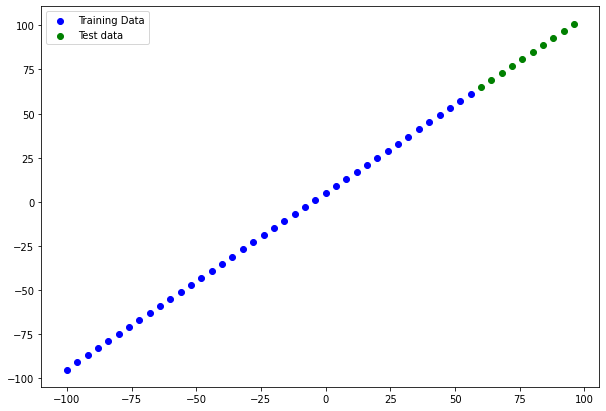

In [19]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

# Show the legend
plt.legend();

Any time we can visualise our data, our model, our anything. It's a good idea.


Keeping this graph in our mind, what we'll be trying is to build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`)

So, let's build our model.

In [20]:
# Set random seed
tf.random.set_seed(42)


# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X_train, y_train, epochs = 100) # commented out on purpose, first we will visualise the model

### Visualise the model

After we've built a model, we might want to visualise the layers and shapes of our model, by called `summary()` on it.

> 🔑 **Note**: Visualizing a model is particularly helpful when you run into input and output shapes mismatches.


In [21]:
# let's see the summary
model.summary()

ValueError: ignored

Since the model is not built, it's not showing us the summary.

We also haven't defined the input the shape while creating a model, it we define the input shape while creating a model, it will automatically build the model.

So what's the input shape of our dataset ?

In [22]:
# since our prediction would be predicting 1 y value from 1 X value, it means X[0] will be the shape of our input
X[0].shape

TensorShape([])

In this case, our `input_shape` is `[1]`.

**Note:** Usually if input_shape isn't defined, Keras tries to figure it out automatically.

In [46]:
# building the model again

# set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape of our model
])

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total Params**: Total number of parameters in the model
* **Trainable params**: These are the parameters(patterns) the model can update as it trains.
* **Non-Trainable params**: These parameters aren't updated during training(this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource**: For a more in-depth overview of the trainabel parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk)

> 🛠 **Exercise**: Try playing around with the number of hidden units in the `Dense` Layer (e.g `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params ? Investigate what's causing the change.

Let's fit the model to the training data

In [47]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs = 100, verbose=0) # verbose controls how much gets output

In [48]:
# check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using `plot_model()`

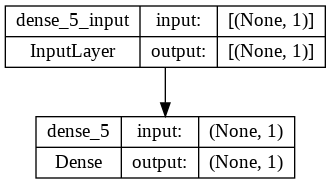

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

In our case, the model we used only has an input and an output but visualizing more complicated models can be very helpful for debugging.

### Visualise the predictions

Now we've got a trained model, let's visualise some prediction.

To visualise the predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs `y_preds` (ground truth vs predictions)

First, we'll make some predictions on the test data(`X_test`), remember the model has never seen the test data.

In [50]:
# make predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 45ms/step


array([[44.477352],
       [47.392593],
       [50.307835],
       [53.223076],
       [56.138313],
       [59.053555],
       [61.968796],
       [64.88403 ],
       [67.79928 ],
       [70.714516]], dtype=float32)

In [32]:
# Ground truth label
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 65,  69,  73,  77,  81,  85,  89,  93,  97, 101], dtype=int32)>

Let's plot them to make a comparision between them, for this we'll be creating a function so that we can be able to use it for later comparisons as well

In [51]:
# Creating a plot_prediction function

import matplotlib.pyplot as plt

def plot_prediction(train_data=X_train,
                    train_label= y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=y_preds):
  """
  This function will help to visualise the prediction using scatter plot.
  It takes train data,train labels, test data, ground truth data and predictions and plot 
  them to visualise.
  """

  # plot the figure
  plt.figure(figsize=(10,7))

  # plot the train data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")

  # plot the test data in green
  plt.scatter(test_data, test_label, c="g", label="Test data")

  # plot the test data vs predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # show the legend
  plt.legend();

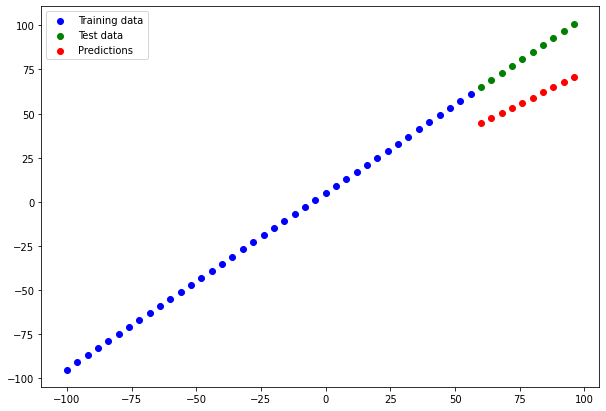

In [54]:
plot_prediction()

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

### Evaluating predictions

Alongside visualizations, evaluation metrics are your alternative best option for evaluating our model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **MAE** : Mean absolute error, the mean difference between each of the predictions
* **MSE** : Mean Squared error, the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller ones)
* **Huber** : Combination of MAE and MSE

The lower each of these values, the better.

We can also use `model.evaluate()` which also returns the metrics results that we mentioned while `model.compile()` as `metrics`

In [55]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 204ms/step - loss: 25.4041 - mae: 25.4041


[25.404064178466797, 25.404064178466797]

In our case, we used MAE as the metrics, so it's showing the MAE of the model.


TensorFlow also has built-in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [57]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38.522648, 35.607407, 32.692165, 29.776922, 26.861689, 23.946445,
       21.031204, 18.115967, 15.760577, 13.771291], dtype=float32)>

It's showing in this format because the shape of `y_test` and `y_preds` are different, and to compare tensors, or do some operations, we have to make sure that shapes should be same.

In [58]:
y_preds.shape, y_test.shape

((10, 1), TensorShape([10]))

In [59]:
# let's squeeze and then calculate mae
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=25.404064>

In [60]:
# calculate the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=655.07434>

Create a function for each for later use

In [63]:
def mae(y_test=y_test,y_preds=y_preds):
  """
  Calculates mean absolute error between y_test and y_preds
  """
  return tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds)).numpy()

def mse(y_test=y_test,y_preds=y_preds):
  """
  Calculates mean squared error between y_test and y_preds
  """
  return tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds)).numpy()

We can also calculate Mean using pure TensorFlow function

In [62]:
tf.reduce_mean(tf.abs(y_test - y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=25>

## Running Experiments to Improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** : get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** : this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer**: give your model more of a chance to find the patterns in the data

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3:

To do so, we'll build 3 models and compare their results:

1. `model_1`: same as original model, 1 layer, trained with 100 epochs.
2. `model_2`: 2 layer, trained with 100 epochs
3. `model_3`: 2 layer, trained with 500 epochs


**Build `model_1`**

In [65]:
# set random seed
tf.random.set_seed(4)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 26.2736 - mae: 26.2736
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 5.8289 - mae: 5.8289
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 5.3501 - mae: 5.3501
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0469 - mae: 11.0469
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 6.0472 - mae: 6.0472
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 4.8599 - mae: 4.8599
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4550 - mae: 8.4550
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1616 - mae: 9.1616
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 5.4323 - mae: 5.4323
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8058 - mae: 8.8058
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 11.

In [66]:
# make predictions
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 63ms/step


array([[50.149574],
       [53.43563 ],
       [56.721687],
       [60.00774 ],
       [63.293797],
       [66.57985 ],
       [69.865906],
       [73.15196 ],
       [76.43802 ],
       [79.724075]], dtype=float32)

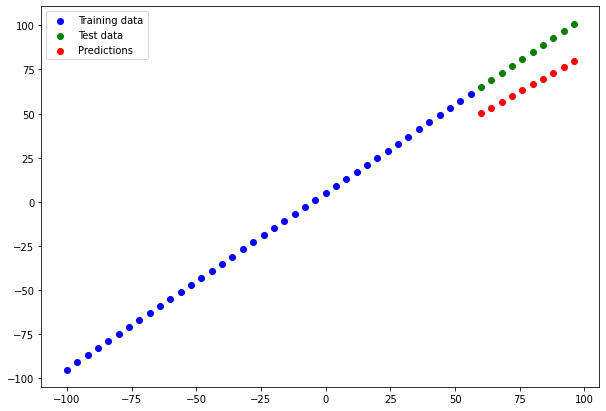

In [67]:
# plot predictions
plot_prediction(predictions=y_pred_1)

In [69]:
# check metrics
mae_1 = mae(y_test,y_pred_1)
mae_1

18.063175

In [70]:
mse_1 = mse(y_test,y_pred_1)
mse_1

330.4835

**Build `model_2`**

Adding one extra dense layer

In [74]:
# set random seed
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # add a second layer
])

# compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=0)

1/1 [==============================] - 0s 42ms/step


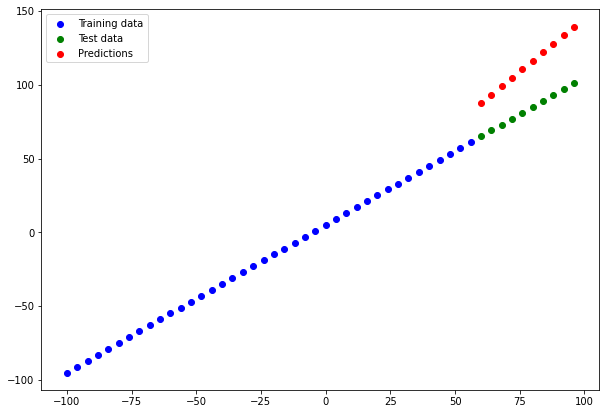

In [75]:
# Make predictions and plot model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [77]:
# Calculate model_2 metics
mae_2 = mae(y_preds=y_preds_2)
mse_2 = mse(y_preds=y_preds_2)
mae_2, mse_2

(30.45366, 953.075)